In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install nltk

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
merged_data = pd.read_csv('/content/drive/MyDrive/merged_data (2).csv', on_bad_lines='skip', engine='python')

In [ ]:
merged_data.shape

(337353, 3)

In [ ]:
import pandas as pd

# Affichage pour contrôle
print(merged_data.shape)
merged_data


(10000, 3)


,listing_id,description,comments
0,3109,Lovely Appartment with one bedroom with a Quee...,Tout s'est bien déroulé. Merci bien. PG
1,3109,Lovely Appartment with one bedroom with a Quee...,Un petit nid fouiller douillet situé dans app...
2,3109,Lovely Appartment with one bedroom with a Quee...,"Appartement spacieux, propre,clair, et calme à..."
3,3109,Lovely Appartment with one bedroom with a Quee...,"Appartement totalement rénové, en parfait état..."
4,5396,"NEW SOFA-BED SINCE JUNE 2023, Please disregard...",Perfect location!! Nasrine was a delight and m...
...,...,...,...
9995,568394,- In the heart of one of the oldest district o...,We loved staying in Alain's apartment in Paris...
9996,568394,- In the heart of one of the oldest district o...,The apartment was exactly as described and was...
9997,568394,- In the heart of one of the oldest district o...,Alain was a wonderful host and we were in awe ...
9998,568394,- In the heart of one of the oldest district o...,La estancia en el apartamento de Alain fue per...


In [ ]:
# Sauvegarder le fichier extrait en conservant la structure de base
output_path = "/content/data_scrapée.csv"
merged_data.to_csv(output_path, index=False)

print(f"✅ Échantillon enregistré : {output_path}")

✅ Échantillon enregistré : /content/data_scrapée.csv


# **Detection de langue**

In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=40542b78efcfe417ae613d853bd555a8eab35a03b9b0f08829128fa43b29ba60
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


## 🌍 Détection de la langue avec `langdetect`

Ce script permet d'identifier automatiquement la langue utilisée dans les colonnes **description** et **commentaires** d’un DataFrame (`merged_data`). Cette étape est essentielle pour appliquer une traduction ciblée ou analyser la diversité linguistique.

---

### 🔧 Étapes principales :

1. **Initialisation de `langdetect`**
   - `DetectorFactory.seed = 42` : On fixe un seed pour garantir la **reproductibilité** des résultats (car `langdetect` peut retourner des résultats légèrement aléatoires).

2. **Fonction de détection sécurisée**
   ```python
   def detect_language(text):
       try:
           return detect(text) if isinstance(text, str) and text.strip() else "unknown"
       except LangDetectException:
        
           return "unknown"


In [ ]:
import pandas as pd
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException

# Assurer la reproductibilité de la détection de langue
DetectorFactory.seed = 42

# Fonction pour détecter la langue en toute sécurité
def detect_language(text):
    try:
        return detect(text) if isinstance(text, str) and text.strip() else "unknown"
    except LangDetectException:
        return "unknown"

# Appliquer la détection sur les descriptions et les commentaires
merged_data["description_lang"] = merged_data["description"].apply(detect_language)
merged_data["comments_lang"] = merged_data["comments"].apply(detect_language)

# Vérifier les langues détectées
print(merged_data[["description", "description_lang", "comments", "comments_lang"]].head(10))

# Afficher la distribution des langues
print("Distribution des langues pour les descriptions :")
print(merged_data["description_lang"].value_counts())

print("\nDistribution des langues pour les commentaires :")
print(merged_data["comments_lang"].value_counts())

                                         description description_lang  \
0  Lovely Appartment with one bedroom with a Quee...               en   
1  Lovely Appartment with one bedroom with a Quee...               en   
2  Lovely Appartment with one bedroom with a Quee...               en   
3  Lovely Appartment with one bedroom with a Quee...               en   
4  NEW SOFA-BED SINCE JUNE 2023, Please disregard...               en   
5  NEW SOFA-BED SINCE JUNE 2023, Please disregard...               en   
6  NEW SOFA-BED SINCE JUNE 2023, Please disregard...               en   
7  NEW SOFA-BED SINCE JUNE 2023, Please disregard...               en   
8  NEW SOFA-BED SINCE JUNE 2023, Please disregard...               en   
9  NEW SOFA-BED SINCE JUNE 2023, Please disregard...               en   

                                            comments comments_lang  
0            Tout s'est bien déroulé. Merci bien. PG            fr  
1  Un petit nid fouiller douillet situé dans  app...      

# **Extraire les données traduites**

In [ ]:
merged_data = pd.read_excel('/content/merged_data_english_only (1).xlsx')

In [ ]:
merged_data.columns

Index(['listing_id', 'description', 'comments', 'description_lang',
       'comments_lang', 'description_translated', 'comments_translated',
       'description_translated_lang', 'comments_translated_lang'],
      dtype='object')

In [ ]:
merged_data.head(10)


,listing_id,description,comments,description_lang,comments_lang,description_translated,comments_translated,description_translated_lang,comments_translated_lang
0,93287,"MODERN AND STYLISH APARTMENT, COMPLETE RENOVAT...","A terrific location. \r<br/>Nice , clean and n...",so,en,"Modann and stylish apartment, complete Renovat...","A terrific location. \r<br/>Nice , clean and n...",en,en
1,93287,"MODERN AND STYLISH APARTMENT, COMPLETE RENOVAT...",The location and the facilities of the apartme...,so,en,"Modann and stylish apartment, complete Renovat...",The location and the facilities of the apartme...,en,en
2,93287,"MODERN AND STYLISH APARTMENT, COMPLETE RENOVAT...",We were so lucky to find this beautiful apartm...,so,en,"Modann and stylish apartment, complete Renovat...",We were so lucky to find this beautiful apartm...,en,en
3,93287,"MODERN AND STYLISH APARTMENT, COMPLETE RENOVAT...",Wonderful apartment in the heart of Paris - on...,so,en,"Modann and stylish apartment, complete Renovat...",Wonderful apartment in the heart of Paris - on...,en,en
4,93287,"MODERN AND STYLISH APARTMENT, COMPLETE RENOVAT...",Excellent location; just steps away from amazi...,so,en,"Modann and stylish apartment, complete Renovat...",Excellent location; just steps away from amazi...,en,en
5,93287,"MODERN AND STYLISH APARTMENT, COMPLETE RENOVAT...",Before I searched for the hotel.....I prayed s...,so,en,"Modann and stylish apartment, complete Renovat...",Before I searched for the hotel.....I prayed s...,en,en
6,93287,"MODERN AND STYLISH APARTMENT, COMPLETE RENOVAT...",This is a BEAUTIFUL apartment. Everything is ...,so,en,"Modann and stylish apartment, complete Renovat...",This is a BEAUTIFUL apartment. Everything is ...,en,en
7,93287,"MODERN AND STYLISH APARTMENT, COMPLETE RENOVAT...",We had a very nice stay at this apartment. Ev...,so,en,"Modann and stylish apartment, complete Renovat...",We had a very nice stay at this apartment. Ev...,en,en
8,93287,"MODERN AND STYLISH APARTMENT, COMPLETE RENOVAT...",Absolutely beautiful apartment! Very clean and...,so,en,"Modann and stylish apartment, complete Renovat...",Absolutely beautiful apartment! Very clean and...,en,en
9,93287,"MODERN AND STYLISH APARTMENT, COMPLETE RENOVAT...",Spotless apartment in a great location. Beauti...,so,en,"Modann and stylish apartment, complete Renovat...",Spotless apartment in a great location. Beauti...,en,en


In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 80.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!pip install swifter
import swifter


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16505 sha256=8945742f38ffb72bb04f6eb2e6a4ccc58329008fc957fbf77075853199908c29
  Stored in directory: /root/.cache/pip/wheels/ef/7f/bd/9bed48f078f3ee1fa75e0b29b6e0335ce1cb03a38d3443b3a3
Successfully built swifter


# **Prétraitement des données**

## ✨ Prétraitement des textes avec spaCy + Swifter (par lots)

Ce script met en place un pipeline de nettoyage et de **tokenisation légère** (sans parsing ni NER) pour préparer les textes avant des tâches NLP (comme la similarité ou le résumé).

---

### ⚙️ Objectif
Nettoyer les colonnes `description` et `comments` :
- Conversion en minuscules
- Suppression des **stopwords** (ex: "the", "and", "is")
- Suppression de la **ponctuation**
- Retour sous forme de **chaîne optimisée** (pas une liste)

---

### 🧰 Outils utilisés
- `spaCy` (`en_core_web_sm`) : tokenisation + nettoyage linguistique
- `swifter` + `tqdm` : accélération du `.apply()` avec barre de progression
- `multiprocessing` : gestion des lots pour économiser de la mémoire (batch_size = 5000)

---

### 🔁 Logique par lot
Le DataFrame est traité **en morceaux** :
```python
for i in range(num_batches):
    df[start:end, 'description_tokens'] = df[start:end, 'description'].apply(preprocess_text_spacy)


In [ ]:
!pip install -U spacy swifter
!python -m spacy download en_core_web_sm
!pip install multiprocessing

import spacy
import pandas as pd
import swifter
import multiprocessing
from tqdm import tqdm

# Charger le modèle spaCy avec accélération GPU (si disponible)
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])  # On désactive les composants inutiles pour accélérer

# Fonction de prétraitement optimisée
def preprocess_text_spacy(text):
    if isinstance(text, str):
        doc = nlp(text.lower())  # Convertir en minuscules et traiter avec spaCy
        tokens = [token.text for token in doc if not token.is_punct and not token.is_stop]  # Supprimer stopwords et ponctuation
        return " ".join(tokens)  # Retourne une seule chaîne au lieu d'une liste pour économiser de la mémoire
    return ""

# Activer tqdm pour la barre de progression
tqdm.pandas()

# Diviser le traitement en **lots** pour éviter la surcharge
batch_size = 5000  # Ajustez selon votre RAM
num_batches = (len(merged_data) // batch_size) + 1

# Appliquer le prétraitement **par lots** et avec **multiprocessing**
for i in range(num_batches):
    start = i * batch_size
    end = (i + 1) * batch_size
    print(f"Traitement du lot {i+1}/{num_batches}...")

    merged_data.loc[start:end, 'description_tokens'] = merged_data.loc[start:end, 'description'].progress_apply(preprocess_text_spacy)
    merged_data.loc[start:end, 'comments_tokens'] = merged_data.loc[start:end, 'comments'].progress_apply(preprocess_text_spacy)

print("✅ Prétraitement terminé !")




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 26.6 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.8.4
    Uninstalling spacy-3.8.4:
      Successfully uninstalled spacy-3.8.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 58.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 4.7 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
e

100%|██████████| 5001/5001 [00:38<00:00, 131.38it/s]


Traitement du lot 2/2...


100%|██████████| 4058/4058 [00:30<00:00, 134.55it/s]

✅ Prétraitement terminé !


## 🧼 Nettoyage final des caractères spéciaux dans les textes

Ce script applique une fonction de nettoyage rigoureuse sur toutes les colonnes d’un `DataFrame` pour garantir des données **propres et exploitables** avant les traitements NLP.

---

### 🔧 Fonction : `remove_illegal_chars(text)`

Elle nettoie chaque texte de manière automatique :

- 🧽 Supprime les balises HTML comme `<br />`
- 🚫 Retire les caractères spéciaux non pertinents
- ⚙️ Élimine les caractères de contrôle invisibles (ASCII entre 0x00 et 0x1F)
- 📏 Normalise les espaces redondants
- 🔠 Convertit le texte en **minuscules**

---

In [ ]:
import openpyxl
import re

# Fonction pour supprimer les caractères illégaux


def remove_illegal_chars(text):
    if isinstance(text, str):
        # Supprimer les balises HTML comme <br />, < br />, etc.
        text = re.sub(r"<\s*br\s*/?\s*>", " ", text, flags=re.IGNORECASE)
        # Supprimer tous les caractères spéciaux sauf lettres, chiffres, ponctuation de base
        text = re.sub(r"[^\w\s.,!?'-]", " ", text)
        # Supprimer les caractères de contrôle
        text = re.sub(r'[\x00-\x1F\x7F-\x9F]', '', text)
        # Normaliser les espaces
        text = re.sub(r"\s+", " ", text)
        return text.strip().lower()
    return text

# Appliquer le nettoyage sur toutes les colonnes
for col in merged_data.columns:
    merged_data[col] = merged_data[col].apply(remove_illegal_chars)

# Sauvegarde après le nettoyage
output_file = "/content/preprocessed_text.xlsx"
merged_data.to_excel(output_file, index=False)

print(f"📂 Fichier enregistré : {output_file}")

# Télécharger automatiquement le fichier
from google.colab import files
files.download(output_file)



📂 Fichier enregistré : /content/preprocessed_text.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
merged_data=pd.read_excel('/content/preprocessed_text (12).xlsx')

In [ ]:
merged_data.isnull().sum()

,0
listing_id,0
description,0
comments,1
description_lang,0
comments_lang,0
description_translated,0
comments_translated,0
description_translated_lang,0
comments_translated_lang,0
description_tokens,0


In [ ]:
# Supprimer les lignes contenant des valeurs nulles
merged_data = merged_data.dropna()

In [ ]:
print(merged_data[['description_tokens', 'comments_tokens']].head(10))
print(merged_data[['description_tokens', 'comments_tokens']].isnull().sum())


                                  description_tokens  \
0  modern stylish apartment complete renovation 2011   
1  modern stylish apartment complete renovation 2011   
2  modern stylish apartment complete renovation 2011   
3  modern stylish apartment complete renovation 2011   
4  modern stylish apartment complete renovation 2011   
5  modern stylish apartment complete renovation 2011   
6  modern stylish apartment complete renovation 2011   
7  modern stylish apartment complete renovation 2011   
8  modern stylish apartment complete renovation 2011   
9  modern stylish apartment complete renovation 2011   

                                     comments_tokens  
0  terrific location nice clean neat apartment ex...  
1  location facilities apartment amazing meet hos...  
2  lucky find beautiful apartment staying paris s...  
3  wonderful apartment heart paris charming pedes...  
4  excellent location steps away amazing patisser...  
5  searched hotel prayed getting best staying mum... 

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 🧠 Tokenisation & Stemming avec NLTK

Ce code prépare les données textuelles pour l’analyse sémantique en effectuant deux étapes clés du prétraitement NLP.

---

### 🔹 Étapes du Pipeline

1. **Tokenisation** :  
   - Utilise `word_tokenize` pour découper les textes (descriptions et commentaires) en **mots individuels (tokens)**.

2. **Stemming** :  
   - Applique l’algorithme **PorterStemmer** pour réduire chaque mot à sa racine.
   - Exemple : *"beautiful", "beauty", "beautify"* → **"beauti"**

---



In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer


# Initialiser le Stemmer
stemmer = PorterStemmer()

# Fonction pour tokeniser et appliquer le stemming
def preprocess_and_stem(text):
    if isinstance(text, str):  # Vérifie si c'est bien une chaîne de caractères
        tokens = word_tokenize(text.lower())  # Tokenisation et mise en minuscule
        stemmed_tokens = [stemmer.stem(token) for token in tokens]  # Stemming des tokens
        return stemmed_tokens
    return []  # Retourne une liste vide si la valeur est NaN ou autre

# Appliquer la tokenisation et le stemming sur les descriptions et les commentaires
merged_data['description_stemmed'] = merged_data['description_tokens'].apply(preprocess_and_stem)
merged_data['comments_stemmed'] = merged_data['comments_tokens'].apply(preprocess_and_stem)

# Vérifier le résultat
print(merged_data[['description_stemmed', 'comments_stemmed']].head(10))




                              description_stemmed  \
0  [modern, stylish, apart, complet, renov, 2011]   
1  [modern, stylish, apart, complet, renov, 2011]   
2  [modern, stylish, apart, complet, renov, 2011]   
3  [modern, stylish, apart, complet, renov, 2011]   
4  [modern, stylish, apart, complet, renov, 2011]   
5  [modern, stylish, apart, complet, renov, 2011]   
6  [modern, stylish, apart, complet, renov, 2011]   
7  [modern, stylish, apart, complet, renov, 2011]   
8  [modern, stylish, apart, complet, renov, 2011]   
9  [modern, stylish, apart, complet, renov, 2011]   

                                    comments_stemmed  
0  [terrif, locat, nice, clean, neat, apart, exce...  
1  [locat, facil, apart, amaz, meet, host, extrem...  
2  [lucki, find, beauti, apart, stay, pari, secon...  
3  [wonder, apart, heart, pari, charm, pedestrian...  
4  [excel, locat, step, away, amaz, patisseri, bo...  
5  [search, hotel, pray, get, best, stay, mum, tr...  
6  [beauti, apart, brand, new, 

In [ ]:
print("Avant TF-IDF, colonnes disponibles :", merged_data.columns)
print("Nombre de lignes et colonnes :", merged_data.shape)


Avant TF-IDF, colonnes disponibles : Index(['listing_id', 'description', 'comments', 'description_lang',
       'comments_lang', 'description_translated', 'comments_translated',
       'description_translated_lang', 'comments_translated_lang',
       'description_tokens', 'comments_tokens', 'description_stemmed',
       'comments_stemmed'],
      dtype='object')
Nombre de lignes et colonnes : (9055, 13)


## 📊 Calcul de Similarité entre Commentaires et Descriptions

Ce script combine deux méthodes d’analyse de texte : TF-IDF et BERT, afin de mesurer la **similarité sémantique** entre les descriptions et les commentaires associés à un logement.

---

### 🔹 Préparation des textes
- Les colonnes `description_stemmed` et `comments_stemmed` (issues du stemming) sont transformées en **chaînes de texte continues** (`description_text`, `comments_text`).
- On supprime les lignes vides après transformation pour éviter les erreurs d’encodage.

---

### 🧠 TF-IDF : Similarité basée sur les fréquences de mots
1. **TF-IDF Vectorization**
   - On initialise un `TfidfVectorizer` (limité à 1000 mots les plus fréquents).
   - On transforme les descriptions et commentaires en vecteurs de poids TF-IDF.

2. **Cosine Similarity**
   - On calcule la **similarité cosinus** entre chaque couple `(description, commentaire)`.

3. **Résultat**
   - Une liste de scores de similarité est générée (`tfidf_similarities`) pour chaque paire de textes.

✅ Cette méthode est rapide et légère, mais **moins contextuelle** que les méthodes basées sur les embeddings de type BERT.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# 🔹 Vérifier que les colonnes sont bien en format texte
merged_data['description_text'] = merged_data['description_stemmed'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')
merged_data['comments_text'] = merged_data['comments_stemmed'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')

# 🔹 Supprimer les lignes vides après conversion
merged_data = merged_data[(merged_data['description_text'] != '') & (merged_data['comments_text'] != '')]


# 🔹 Convertir explicitement en chaînes de caractères
merged_data['description_text'] = merged_data['description_text'].astype(str)
merged_data['comments_text'] = merged_data['comments_text'].astype(str)

# ✅ Suppression des anciennes colonnes inutiles
merged_data.drop(columns=['description_stemmed', 'comments_stemmed'], inplace=True, errors='ignore')

# 🔹 Initialiser et appliquer TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_desc_matrix = tfidf_vectorizer.fit_transform(merged_data['description_text'])
tfidf_comm_matrix = tfidf_vectorizer.transform(merged_data['comments_text'])  # Utiliser le même vocabulaire

# 🔹 Calculer la similarité avec TF-IDF
tfidf_similarities = [cosine_similarity([tfidf_desc_matrix[i].toarray()[0]], [tfidf_comm_matrix[i].toarray()[0]])[0][0]
                      for i in range(len(merged_data))]

print("✅ TF-IDF Similarity calculée avec succès !")
tfidf_similarities

<ipython-input-21-40fa76457f4c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['description_text'] = merged_data['description_text'].astype(str)
<ipython-input-21-40fa76457f4c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['comments_text'] = merged_data['comments_text'].astype(str)
<ipython-input-21-40fa76457f4c>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

✅ TF-IDF Similarity calculée avec succès !


[np.float64(0.024473073855628556),
 np.float64(0.03749486739149368),
 np.float64(0.07667387054941457),
 np.float64(0.04509356861242617),
 np.float64(0.014890982811742965),
 np.float64(0.007128009458408005),
 np.float64(0.01727914126550764),
 np.float64(0.03894459341848668),
 np.float64(0.04227905650613061),
 np.float64(0.3005723198714615),
 np.float64(0.05284085318658122),
 np.float64(0.11002229367782783),
 np.float64(0.09738878731704574),
 np.float64(0.012578764257954973),
 np.float64(0.036239595315928755),
 np.float64(0.043462939841441756),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.050519307388553245),
 np.float64(0.039968443778941515),
 np.float64(0.1713659367147602),
 np.float64(0.0),
 np.float64(0.0897795061759396),
 np.float64(0.0),
 np.float64(0.036807091335494424),
 np.float64(0.04988024076684692),
 np.float64(0.07700262060686144),
 np.float64(0.0),
 np.float64(0.07612253705529773),
 np.float64(0.028494647384409325),
 np.float64(0.024149639695708196),
 np.float64(0.0472

In [ ]:
!pip install --upgrade numpy gensim --quiet
import os
os.kill(os.getpid(), 9)  # Redémarre le runtime pour appliquer les changements


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 103.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 11.1 MB/s eta 0:00:00


# **Word2Vec et cosine similarity**

In [ ]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

# 🔹 Supprimer les lignes vides ou incorrectes
merged_data = merged_data[(merged_data['description_stemmed'].apply(lambda x: isinstance(x, list) and len(x) > 0)) &
                          (merged_data['comments_stemmed'].apply(lambda x: isinstance(x, list) and len(x) > 0))]

merged_data = merged_data.reset_index(drop=True)  # ✅ Clé pour éviter KeyError plus bas

# 🔹 Fusionner les textes en une seule liste pour entraîner Word2Vec
all_texts = merged_data['description_stemmed'].tolist() + merged_data['comments_stemmed'].tolist()

# 🔹 Entraîner le modèle Word2Vec
w2v_model = Word2Vec(sentences=all_texts, vector_size=100, window=5, min_count=1, workers=4)

# 🔹 Fonction pour convertir une liste de mots en vecteur moyen
def get_mean_vector(words, model):
    valid_words = [word for word in words if word in model.wv]
    if valid_words:
        return np.mean([model.wv[word] for word in valid_words], axis=0)
    else:
        return np.zeros(model.vector_size)

# 🔹 Appliquer la conversion sur chaque ligne
merged_data['desc_vector'] = merged_data['description_stemmed'].apply(lambda x: get_mean_vector(x, w2v_model))
merged_data['comm_vector'] = merged_data['comments_stemmed'].apply(lambda x: get_mean_vector(x, w2v_model))

# 🔹 Calculer la similarité cosinus
similarities = [cosine_similarity([merged_data.loc[i, 'desc_vector']], [merged_data.loc[i, 'comm_vector']])[0][0]
                for i in range(len(merged_data))]

print("✅ Similarité Word2Vec calculée avec succès !")
similarities



✅ Similarité Word2Vec calculée avec succès !


[0.6354914,
 0.5693334,
 0.63878256,
 0.6903395,
 0.63918805,
 0.56851727,
 0.48604426,
 0.57381475,
 0.6423337,
 0.7522611,
 0.6725739,
 0.66116786,
 0.64767975,
 0.4698358,
 0.48001176,
 0.49474746,
 0.11377944,
 0.6508883,
 0.54996496,
 0.56492245,
 0.70108014,
 0.55417615,
 0.5818036,
 0.46842813,
 0.4248929,
 0.5531583,
 0.6384798,
 0.16488947,
 0.6636999,
 0.5279938,
 0.39550975,
 0.568448,
 0.73114693,
 0.5477101,
 0.45764354,
 0.63526386,
 0.5947421,
 0.59687114,
 0.7121311,
 0.612487,
 0.6299137,
 0.57333434,
 0.590222,
 0.57739544,
 0.58524257,
 0.6258792,
 0.5355146,
 0.62253827,
 0.5442983,
 0.6423644,
 0.5443066,
 0.5993731,
 0.70379746,
 0.63881034,
 0.72715616,
 0.7263783,
 0.12121283,
 0.59049743,
 0.5453401,
 0.15196028,
 0.5287764,
 0.43228412,
 0.72510594,
 0.4503147,
 0.5500254,
 0.6178716,
 0.6355797,
 0.5130873,
 0.6334061,
 0.49343732,
 0.47003168,
 0.6623148,
 0.56984097,
 0.66278374,
 0.53946084,
 0.5577583,
 0.58435684,
 0.7107252,
 0.5642172,
 0.5116302,
 0.4

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np

# 🔹 Vérifier que les colonnes sont bien des listes de mots
merged_data = merged_data[(merged_data['description_stemmed'].apply(lambda x: isinstance(x, list) and len(x) > 0)) &
                          (merged_data['comments_stemmed'].apply(lambda x: isinstance(x, list) and len(x) > 0))]

merged_data = merged_data.reset_index(drop=True)

# 🔹 Rejoindre les tokens en texte
merged_data['description_text'] = merged_data['description_stemmed'].apply(lambda x: ' '.join(x))
merged_data['comments_text'] = merged_data['comments_stemmed'].apply(lambda x: ' '.join(x))

# 🔹 Charger le modèle RoBERTa
roberta_model = SentenceTransformer('sentence-transformers/all-roberta-large-v1')  # version fine-tunée pour similarité

# 🔹 Encoder les descriptions et commentaires
desc_embeddings_roberta = roberta_model.encode(merged_data['description_text'].tolist(), show_progress_bar=True)
comm_embeddings_roberta = roberta_model.encode(merged_data['comments_text'].tolist(), show_progress_bar=True)

# 🔹 Calculer la similarité cosinus
similarities_roberta = [cosine_similarity([desc_embeddings_roberta[i]], [comm_embeddings_roberta[i]])[0][0]
                        for i in range(len(merged_data))]

print("✅ Similarité RoBERTa calculée avec succès !")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/9.68k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/650 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/328 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

Batches:   0%|          | 0/283 [00:00<?, ?it/s]

Batches:   0%|          | 0/283 [00:00<?, ?it/s]

✅ Similarité RoBERTa calculée avec succès !


In [ ]:
# 🔹 Afficher les 10 premières similarités
for i, sim in enumerate(similarities_roberta[:50]):
    print(f"Ligne {i} → Similarité RoBERTa : {sim:.4f}")


Ligne 0 → Similarité RoBERTa : 0.3145
Ligne 1 → Similarité RoBERTa : 0.3731
Ligne 2 → Similarité RoBERTa : 0.3892
Ligne 3 → Similarité RoBERTa : 0.4859
Ligne 4 → Similarité RoBERTa : 0.3173
Ligne 5 → Similarité RoBERTa : 0.2929
Ligne 6 → Similarité RoBERTa : 0.4612
Ligne 7 → Similarité RoBERTa : 0.4005
Ligne 8 → Similarité RoBERTa : 0.4247
Ligne 9 → Similarité RoBERTa : 0.5585
Ligne 10 → Similarité RoBERTa : 0.4416
Ligne 11 → Similarité RoBERTa : 0.4823
Ligne 12 → Similarité RoBERTa : 0.2610
Ligne 13 → Similarité RoBERTa : 0.2838
Ligne 14 → Similarité RoBERTa : 0.2735
Ligne 15 → Similarité RoBERTa : 0.2648
Ligne 16 → Similarité RoBERTa : 0.4383
Ligne 17 → Similarité RoBERTa : 0.3698
Ligne 18 → Similarité RoBERTa : 0.2772
Ligne 19 → Similarité RoBERTa : 0.4234
Ligne 20 → Similarité RoBERTa : 0.5039
Ligne 21 → Similarité RoBERTa : 0.3211
Ligne 22 → Similarité RoBERTa : 0.3674
Ligne 23 → Similarité RoBERTa : 0.3296
Ligne 24 → Similarité RoBERTa : 0.1462
Ligne 25 → Similarité RoBERTa : 0.3

In [ ]:
# Ajouter les scores dans le DataFrame
merged_data['sim_word2vec'] = similarities
merged_data['sim_roberta'] = similarities_roberta

# Exemple : moyenne des similarités
print("📊 Moyennes des similarités :")
print("Word2Vec :", np.mean(merged_data['sim_word2vec']))
print("RoBERTa  :", np.mean(merged_data['sim_roberta']))


📊 Moyennes des similarités :
Word2Vec : 0.59369653
RoBERTa  : 0.45358205


In [ ]:
merged_data.columns

Index(['listing_id', 'description', 'comments', 'description_lang',
       'comments_lang', 'description_translated', 'comments_translated',
       'description_translated_lang', 'comments_translated_lang',
       'description_tokens', 'comments_tokens', 'description_stemmed',
       'comments_stemmed', 'desc_vector', 'comm_vector'],
      dtype='object')

In [ ]:
"""# Vérifier les entrées nulles
print("Descriptions vides:", merged_data['description_stemmed'].isna().sum())
print("Commentaires vides:", merged_data['comments_stemmed'].isna().sum())

# Supprimer les entrées nulles ou vides
merged_data = merged_data.dropna(subset=['description_stemmed', 'comments_stemmed'])

# Vérifier si certaines valeurs sont des listes vides
merged_data = merged_data[merged_data['description_stemmed'].apply(lambda x: isinstance(x, str) and len(x.strip()) > 0)]
merged_data = merged_data[merged_data['comments_stemmed'].apply(lambda x: isinstance(x, str) and len(x.strip()) > 0)]

# Vérification après nettoyage
print("Descriptions après nettoyage:", len(merged_data['description_stemmed']))
print("Commentaires après nettoyage:", len(merged_data['comments_stemmed']))
"""



'# Vérifier les entrées nulles\nprint("Descriptions vides:", merged_data[\'description_stemmed\'].isna().sum())\nprint("Commentaires vides:", merged_data[\'comments_stemmed\'].isna().sum())\n\n# Supprimer les entrées nulles ou vides\nmerged_data = merged_data.dropna(subset=[\'description_stemmed\', \'comments_stemmed\'])\n\n# Vérifier si certaines valeurs sont des listes vides\nmerged_data = merged_data[merged_data[\'description_stemmed\'].apply(lambda x: isinstance(x, str) and len(x.strip()) > 0)]\nmerged_data = merged_data[merged_data[\'comments_stemmed\'].apply(lambda x: isinstance(x, str) and len(x.strip()) > 0)]\n\n# Vérification après nettoyage\nprint("Descriptions après nettoyage:", len(merged_data[\'description_stemmed\']))\nprint("Commentaires après nettoyage:", len(merged_data[\'comments_stemmed\']))\n'

In [ ]:
merged_data.columns

Index(['listing_id', 'description', 'comments', 'description_lang',
       'comments_lang', 'description_translated', 'comments_translated',
       'description_translated_lang', 'comments_translated_lang',
       'description_tokens', 'comments_tokens', 'description_text',
       'comments_text'],
      dtype='object')

In [ ]:
!pip install ace_tools

In [ ]:
import time
while True:
    time.sleep(600)  # Garde la session active
    print("Session Active ✅")


Session Active ✅
Session Active ✅
Session Active ✅
Session Active ✅
Session Active ✅


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-26-a30bda5e1c99>", line 3, in <cell line: 0>
    time.sleep(600)  # Garde la session active
    ^^^^^^^^^^^^^^^
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
 

TypeError: object of type 'NoneType' has no len()

## 🧠 Similarité Sémantique avec BERT (Sentence Transformers)

Ce code utilise le modèle **`paraphrase-multilingual-MiniLM-L12-v2`** de la librairie `sentence-transformers` pour calculer la **similarité cosinus** entre des descriptions de logements et leurs commentaires associés.

---

### 🔹 Étapes principales

1. **Chargement du modèle pré-entraîné**
   ```python
   bert_model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')


In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# 🔹 Charger le modèle BERT pré-entraîné
bert_model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')  # Modèle plus léger et rapide


# 🔹 Convertir les descriptions en vecteurs BERT
description_embeddings = bert_model.encode(merged_data['description_text'].tolist(), show_progress_bar=True)

# 🔹 Convertir les commentaires en vecteurs BERT
comments_list = merged_data['comments_text'].tolist()
comments_embeddings = bert_model.encode(comments_list, show_progress_bar=True)

# 🔹 Calculer la similarité entre chaque description et ses propres commentaires
similarity_scores = [cosine_similarity([desc], [comm])[0][0] for desc, comm in zip(description_embeddings, comments_embeddings)]

# 🔹 Créer un DataFrame avec les résultats
similarity_df = pd.DataFrame({
    'listing_id': merged_data['listing_id'],
    'description': merged_data['description'],
    'comment': merged_data['comments'],
    'similarity_score': similarity_scores
})


similarity_df.head()
# 🔹 Vérifier le nombre de lignes finales
print(f"✅ Matrice de similarité générée avec {len(similarity_df)} lignes.")


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.89k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/283 [00:00<?, ?it/s]

Batches:   0%|          | 0/283 [00:00<?, ?it/s]

✅ Matrice de similarité générée avec 9055 lignes.


In [ ]:
# Ajouter les scores dans le DataFrame
merged_data['sim_Bert'] = similarity_scores
merged_data['sim_roberta'] = similarities_roberta

# Exemple : moyenne des similarités
print("📊 Moyennes des similarités :")
print("Bert :", np.mean(merged_data['sim_word2vec']))
print("RoBERTa  :", np.mean(merged_data['sim_roberta']))


📊 Moyennes des similarités :
Bert : 0.59369653
RoBERTa  : 0.45358205


<ipython-input-19-e86627244e8a>:10: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


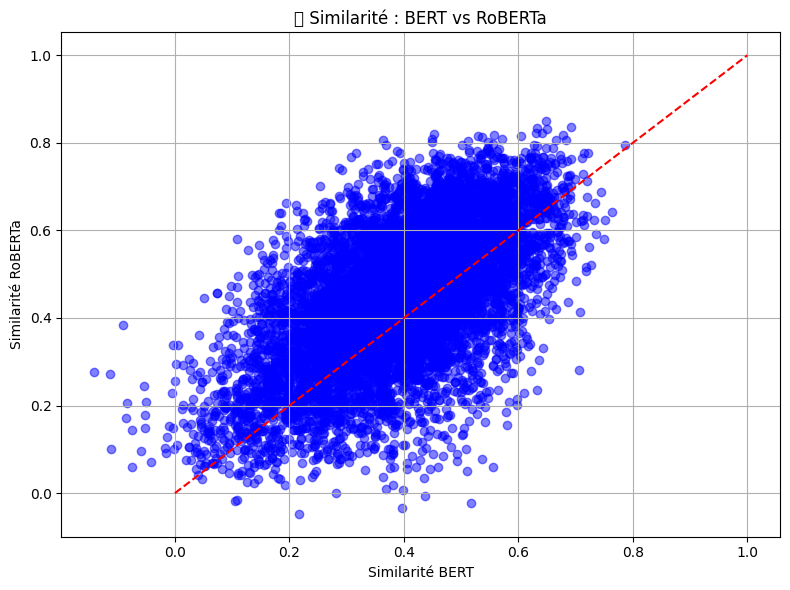

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(merged_data['sim_Bert'], merged_data['sim_roberta'], alpha=0.5, c='blue')
plt.plot([0, 1], [0, 1], 'r--')  # diagonale de référence
plt.title('🔍 Similarité : BERT vs RoBERTa')
plt.xlabel('Similarité BERT')
plt.ylabel('Similarité RoBERTa')
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-20-125cdf7217eb>:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


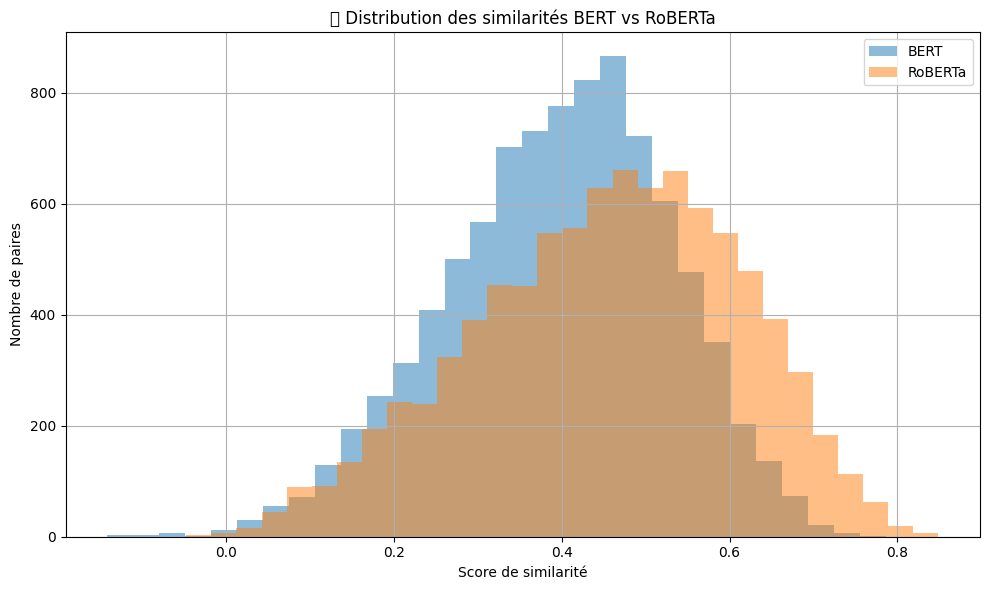

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(merged_data['sim_Bert'], bins=30, alpha=0.5, label='BERT')
plt.hist(merged_data['sim_roberta'], bins=30, alpha=0.5, label='RoBERTa')
plt.title('📊 Distribution des similarités BERT vs RoBERTa')
plt.xlabel('Score de similarité')
plt.ylabel('Nombre de paires')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-21-4a763751019b>:16: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


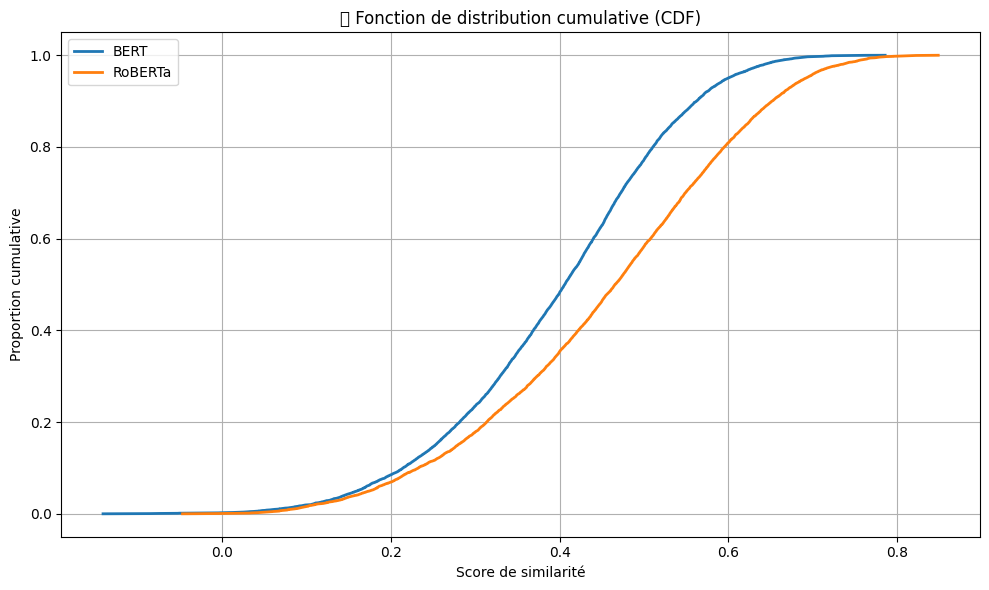

In [ ]:
import numpy as np

# Trier les scores
bert_sorted = np.sort(merged_data['sim_Bert'])
roberta_sorted = np.sort(merged_data['sim_roberta'])

# Courbes CDF
plt.figure(figsize=(10, 6))
plt.plot(bert_sorted, np.linspace(0, 1, len(bert_sorted)), label='BERT', linewidth=2)
plt.plot(roberta_sorted, np.linspace(0, 1, len(roberta_sorted)), label='RoBERTa', linewidth=2)
plt.title('📈 Fonction de distribution cumulative (CDF)')
plt.xlabel('Score de similarité')
plt.ylabel('Proportion cumulative')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

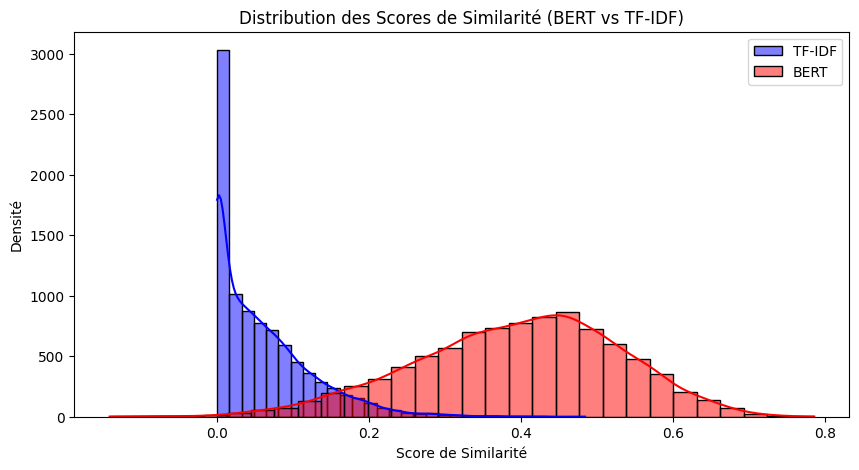

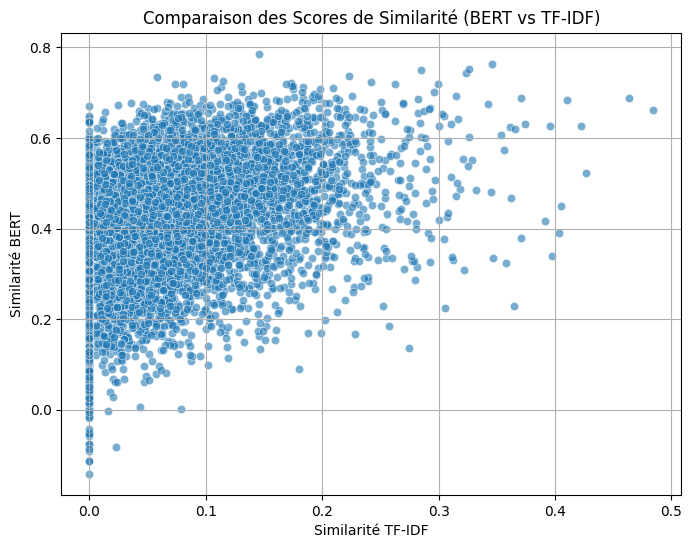

   listing_id                                        description  \
0       93287  modern and stylish apartment, complete renovat...   
1       93287  modern and stylish apartment, complete renovat...   
2       93287  modern and stylish apartment, complete renovat...   
3       93287  modern and stylish apartment, complete renovat...   
4       93287  modern and stylish apartment, complete renovat...   

                                             comment  similarity_tfidf  \
0  a terrific location. nice , clean and neat apa...          0.024473   
1  the location and the facilities of the apartme...          0.037495   
2  we were so lucky to find this beautiful apartm...          0.076674   
3  wonderful apartment in the heart of paris - on...          0.045094   
4  excellent location just steps away from amazin...          0.014891   

   similarity_bert  
0         0.354164  
1         0.264912  
2         0.402724  
3         0.348905  
4         0.369920  


In [ ]:
# 🔹 Créer un DataFrame pour comparaison
comparison_df = pd.DataFrame({
    'listing_id': merged_data['listing_id'],
    'description': merged_data['description'],
    'comment': merged_data['comments'],
    'similarity_tfidf': tfidf_similarities,
    'similarity_bert': similarity_scores
})

# ✅ 1. Affichage des distributions des similarités
plt.figure(figsize=(10, 5))
sns.histplot(comparison_df['similarity_tfidf'], color='blue', label='TF-IDF', kde=True, bins=30)
sns.histplot(comparison_df['similarity_bert'], color='red', label='BERT', kde=True, bins=30)
plt.xlabel("Score de Similarité")
plt.ylabel("Densité")
plt.title("Distribution des Scores de Similarité (BERT vs TF-IDF)")
plt.legend()
plt.show()

# ✅ 2. Comparaison des scores de similarité en scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=comparison_df['similarity_tfidf'], y=comparison_df['similarity_bert'], alpha=0.6)
plt.xlabel("Similarité TF-IDF")
plt.ylabel("Similarité BERT")
plt.title("Comparaison des Scores de Similarité (BERT vs TF-IDF)")
plt.grid()
plt.show()

# ✅ 3. Affichage d'un aperçu des 5 premiers résultats
print(comparison_df.head())


In [ ]:
!pip install tqdm


In [ ]:
merged_data.columns

Index(['listing_id', 'description', 'comments', 'description_lang',
       'comments_lang', 'description_translated', 'comments_translated',
       'description_translated_lang', 'comments_translated_lang',
       'description_tokens', 'comments_tokens', 'description_text',
       'comments_text'],
      dtype='object')

In [ ]:
similarity_df.columns

Index(['listing_id', 'description', 'comment', 'similarity_score'], dtype='object')

In [ ]:
import pandas as pd

# 🔹 Charger le DataFrame `similarity_df`
# Assurez-vous que `similarity_df` contient bien les colonnes nécessaires
if 'description' in similarity_df.columns and 'comment' in similarity_df.columns and 'similarity_score' in similarity_df.columns:

    # 🔹 Sélectionner les 5 commentaires les plus proches pour chaque description
    top_5_df = similarity_df.sort_values(by=['description', 'similarity_score'], ascending=[True, False]) \
                            .groupby('description') \
                            .head(5) \
                            .reset_index(drop=True)
    top_5_df = top_5_df.rename(columns={'comment': 'comments'})

    # 🔹 Filtrer `merged_data` pour ne garder que les lignes sélectionnées
    merged_data = merged_data.merge(top_5_df[['description', 'comments']], on=['description', 'comments'], how='inner')

    print(f"✅ Nombre de lignes après filtrage : {len(merged_data)}")

    # 🔹 Enregistrer dans un fichier Excel
    output_path = "top_5_comments_per_description.xlsx"
    merged_data.to_excel(output_path, index=False)
    print(f"📁 Fichier sauvegardé : {output_path}")

else:
    print("❌ Les colonnes 'description', 'comment' et 'similarity_score' sont introuvables dans `similarity_df`.")


✅ Nombre de lignes après filtrage : 736
📁 Fichier sauvegardé : top_5_comments_per_description.xlsx


In [ ]:

merged_data.head()

,listing_id,description,comments,description_lang,comments_lang,description_translated,comments_translated,description_translated_lang,comments_translated_lang,description_tokens,comments_tokens,description_text,comments_text
0,93287,"modern and stylish apartment, complete renovat...",it was exactly what we were looking for... sta...,so,en,"modann and stylish apartment, complete renovat...",it was exactly what we were looking for... sta...,en,en,modern stylish apartment complete renovation 2011,exactly looking staying 4 year old daughter ap...,modern stylish apart complet renov 2011,exactli look stay 4 year old daughter apart cl...
1,93287,"modern and stylish apartment, complete renovat...",i'd rather keep it for myself as i firmly inte...,so,en,"modann and stylish apartment, complete renovat...",i'd rather keep it for myself as i firmly inte...,en,en,modern stylish apartment complete renovation 2011,firmly intend use flat time paris perfect loca...,modern stylish apart complet renov 2011,firmli intend use flat time pari perfect locat...
2,93287,"modern and stylish apartment, complete renovat...",not only is this apartment one of the most bea...,so,en,"modann and stylish apartment, complete renovat...",not only is this apartment one of the most bea...,en,en,modern stylish apartment complete renovation 2011,apartment beautiful seen town jean- francois a...,modern stylish apart complet renov 2011,apart beauti seen town jean- francoi amaz host...
3,93287,"modern and stylish apartment, complete renovat...","this is a very nice, clean, comfortable apartm...",so,en,"modann and stylish apartment, complete renovat...","this is a very nice, clean, comfortable apartm...",en,en,modern stylish apartment complete renovation 2011,nice clean comfortable apartment lots amenitie...,modern stylish apart complet renov 2011,nice clean comfort apart lot amen photo descri...
4,93287,"modern and stylish apartment, complete renovat...","the apartment is gorgeous, quite large, remode...",so,en,"modann and stylish apartment, complete renovat...","the apartment is gorgeous, quite large, remode...",en,en,modern stylish apartment complete renovation 2011,apartment gorgeous large remodeled impeccable ...,modern stylish apart complet renov 2011,apart gorgeou larg remodel impecc tast stylish...
